In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings("ignore")




In [60]:
df = pd.read_csv('C:\\Users\\sahil\\Desktop\\xebia\\data\\medicine_quality_dataset.csv')

In [7]:
df.sample(10)

,Active Ingredient,Days Until Expiry,Storage Temperature (°C),Warning Labels Present,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Safe/Not Safe
787,Omeprazole,349.0,NaN,1.0,91.482573,6.158940,0.416921,NaN,Not Safe
441,Cetirizine,512.0,22.312468,1.0,98.521621,NaN,0.478894,95.898901,Not Safe
357,Ciprofloxacin,366.0,21.355656,1.0,93.941408,17.317214,0.193416,93.940910,Not Safe
34,Amoxicillin,NaN,NaN,1.0,87.327971,5.797913,0.418118,99.335447,Not Safe
322,Aspirin,486.0,27.249515,NaN,85.249242,17.803846,0.071695,102.989686,Safe
994,Metformin,648.0,15.005875,1.0,87.744360,15.594086,0.205604,90.660330,Not Safe
567,Metformin,NaN,NaN,NaN,86.223248,25.718302,NaN,98.183916,Safe
552,Ibuprofen,839.0,15.785343,0.0,97.850297,1.374921,0.282441,NaN,Safe
738,Metformin,891.0,16.947650,1.0,NaN,18.962695,0.053219,106.384382,Not Safe
862,Aspirin,114.0,29.522250,0.0,97.634135,17.356274,0.415548,98.165827,Not Safe


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Active Ingredient              1044 non-null   object 
 1   Days Until Expiry              1042 non-null   float64
 2   Storage Temperature (°C)       1042 non-null   float64
 3   Warning Labels Present         1036 non-null   float64
 4   Dissolution Rate (%)           1029 non-null   float64
 5   Disintegration Time (minutes)  1043 non-null   float64
 6   Impurity Level (%)             1041 non-null   float64
 7   Assay Purity (%)               1040 non-null   float64
 8   Safe/Not Safe                  1100 non-null   object 
dtypes: float64(7), object(2)
memory usage: 77.5+ KB


In [9]:
df.shape

(1100, 9)

Check missing value

In [10]:
df.isna().sum()

Active Ingredient                56
Days Until Expiry                58
Storage Temperature (°C)         58
Warning Labels Present           64
Dissolution Rate (%)             71
Disintegration Time (minutes)    57
Impurity Level (%)               59
Assay Purity (%)                 60
Safe/Not Safe                     0
dtype: int64

In [11]:
# 1. Check for any rows with missing values
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,Active Ingredient,Days Until Expiry,Storage Temperature (°C),Warning Labels Present,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Safe/Not Safe
1,Aspirin,NaN,15.105437,0.0,98.913578,20.429400,0.383462,91.517530,Not Safe
5,NaN,258.0,28.294783,0.0,89.355986,13.422490,0.040967,93.335515,Not Safe
9,Omeprazole,745.0,22.459725,0.0,99.781750,5.865483,NaN,102.004489,Safe
13,Cetirizine,156.0,17.160734,1.0,88.540813,NaN,0.108131,104.287411,Safe
15,Metformin,NaN,21.520634,1.0,94.102875,28.042866,0.096323,102.117122,Safe
...,...,...,...,...,...,...,...,...,...
1091,Atorvastatin,NaN,15.259373,0.0,95.255078,7.889312,0.170361,97.601461,Safe
1092,Ibuprofen,877.0,25.539441,1.0,84.897277,NaN,0.065569,93.882278,Not Safe
1095,Ciprofloxacin,766.0,24.999768,1.0,96.067075,21.173433,NaN,98.750045,Safe
1097,Ibuprofen,NaN,25.699618,0.0,94.387423,3.916842,0.156035,93.994388,Not Safe


since there 400 diffrent rows so deletion is  not a option  so insert using knn

In [12]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [13]:
imputer = KNNImputer(n_neighbors=5)
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [14]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Days Until Expiry              1100 non-null   float64
 1   Storage Temperature (°C)       1100 non-null   float64
 2   Warning Labels Present         1100 non-null   float64
 3   Dissolution Rate (%)           1100 non-null   float64
 4   Disintegration Time (minutes)  1100 non-null   float64
 5   Impurity Level (%)             1100 non-null   float64
 6   Assay Purity (%)               1100 non-null   float64
dtypes: float64(7)
memory usage: 60.3 KB


handle missing value in categorical colums

In [15]:
df_cat = df.select_dtypes(include=['object'])

In [16]:
df_cat.isna().sum()

Active Ingredient    56
Safe/Not Safe         0
dtype: int64

In [17]:
df_cat['Active Ingredient'].value_counts()

Active Ingredient
Aspirin          123
Omeprazole       113
Cetirizine       112
Ibuprofen        109
Ciprofloxacin    107
Metformin        104
Paracetamol       95
Atorvastatin      95
Amoxicillin       94
Lisinopril        92
Name: count, dtype: int64

In [18]:
df_cat['Active Ingredient']= df_cat['Active Ingredient'].fillna(df_cat['Active Ingredient'].mode()[0])

In [19]:
df_final = pd.concat([df_cat.reset_index(drop=True),
                      df_numeric.reset_index(drop=True)], axis=1)

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Active Ingredient              1100 non-null   object 
 1   Safe/Not Safe                  1100 non-null   object 
 2   Days Until Expiry              1100 non-null   float64
 3   Storage Temperature (°C)       1100 non-null   float64
 4   Warning Labels Present         1100 non-null   float64
 5   Dissolution Rate (%)           1100 non-null   float64
 6   Disintegration Time (minutes)  1100 non-null   float64
 7   Impurity Level (%)             1100 non-null   float64
 8   Assay Purity (%)               1100 non-null   float64
dtypes: float64(7), object(2)
memory usage: 77.5+ KB


check duplicates

In [21]:
df_final.duplicated().sum()

277

In [22]:
df_cleaned = df_final.drop_duplicates()
df_cleaned.shape

(823, 9)

check for outliers

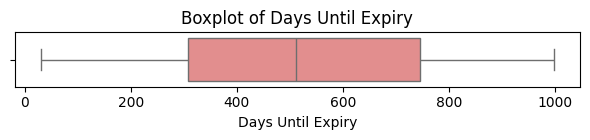

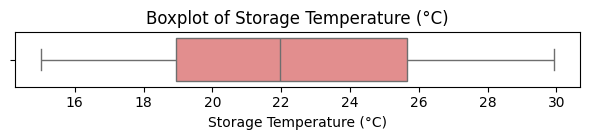

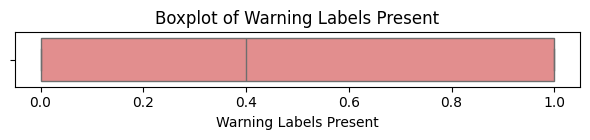

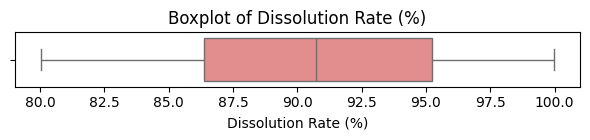

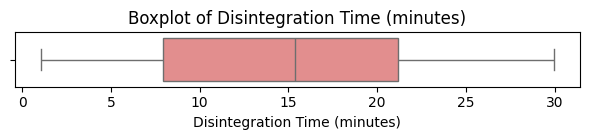

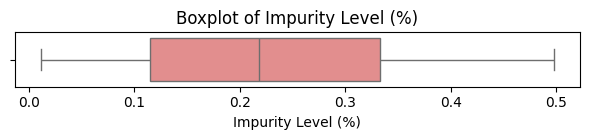

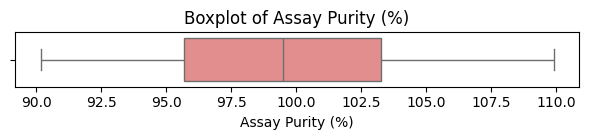

In [23]:
num_features = df_cleaned.select_dtypes(include='number').columns.tolist()
for col in num_features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df_cleaned, x=col, color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

As we see there is no outliers in the data

Detailed Analysis of each feature

In [24]:
df_cleaned.columns

Index(['Active Ingredient', 'Safe/Not Safe', 'Days Until Expiry',
       'Storage Temperature (°C)', 'Warning Labels Present',
       'Dissolution Rate (%)', 'Disintegration Time (minutes)',
       'Impurity Level (%)', 'Assay Purity (%)'],
      dtype='object')

# check for first columns

In [25]:
df_cleaned['Active Ingredient'].unique()

array(['Aspirin', 'Paracetamol', 'Amoxicillin', 'Lisinopril',
       'Cetirizine', 'Omeprazole', 'Ciprofloxacin', 'Atorvastatin',
       'Ibuprofen', 'Metformin'], dtype=object)

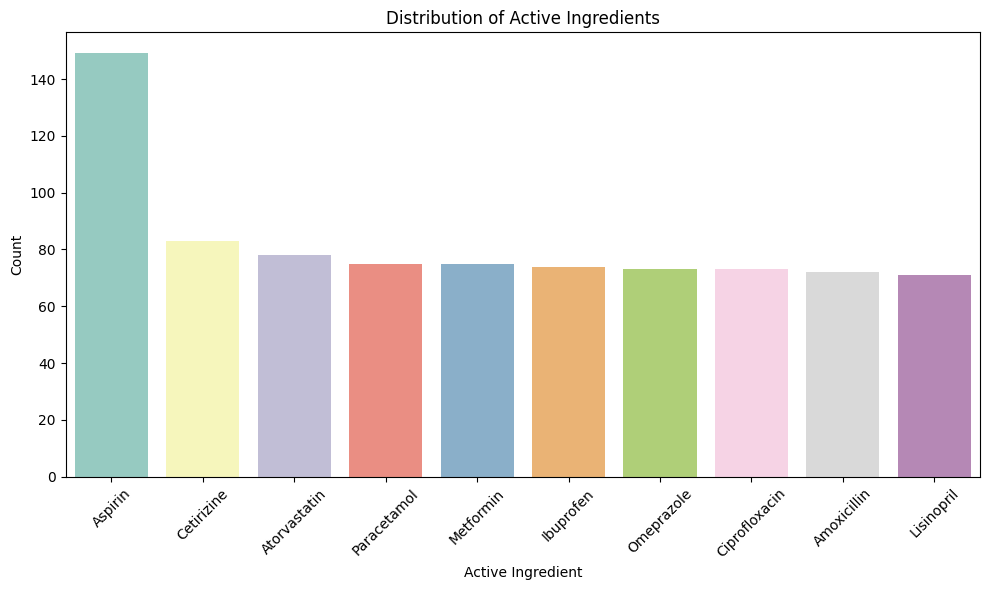

In [26]:

plt.figure(figsize=(10, 6))

# Fix: use .index to pass category names in correct order
order = df_cleaned['Active Ingredient'].value_counts().index

sns.countplot(data=df_cleaned, x='Active Ingredient', order=order, palette="Set3")

plt.xticks(rotation=45)
plt.title('Distribution of Active Ingredients')
plt.xlabel('Active Ingredient')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# check for safe and not safe columns

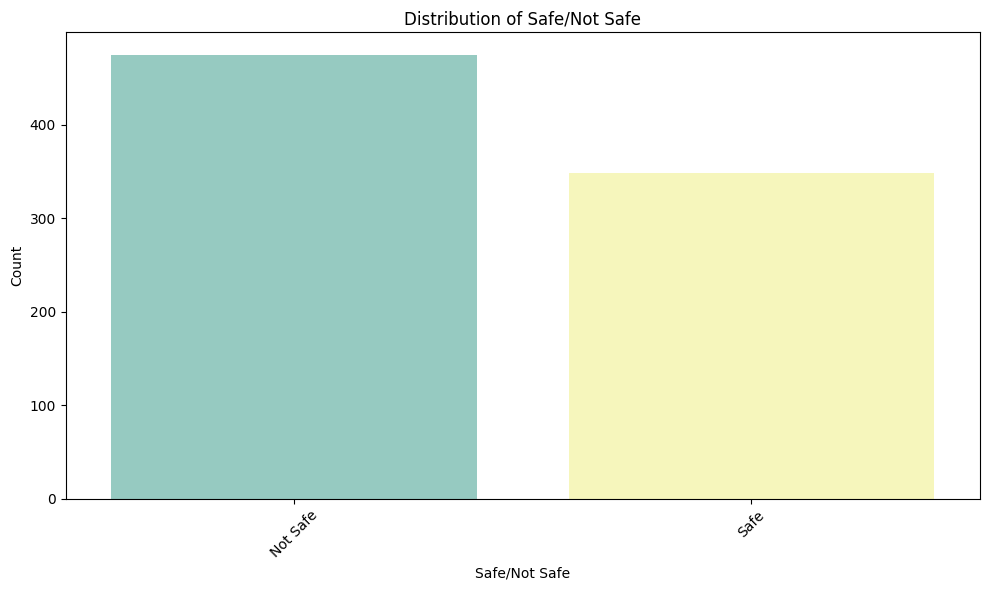

In [27]:

plt.figure(figsize=(10, 6))

# Fix: use .index to pass category names in correct order
order = df_cleaned['Safe/Not Safe'].value_counts().index

sns.countplot(data=df_cleaned, x='Safe/Not Safe', order=order, palette="Set3")

plt.xticks(rotation=45)
plt.title('Distribution of Safe/Not Safe')
plt.xlabel('Safe/Not Safe')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

conclussion not safe have higher values

# check for Days Until Expiry

In [28]:
df_cleaned['Days Until Expiry'].unique()

array([806. , 734.6, 212. , 197. , 480. , 258. , 688. , 677. , 975. ,
       745. , 837. , 385. , 842. , 156. , 386. , 924.6, 494. , 401. ,
       502. , 418. , 735. , 332. , 256. , 911. ,  51. ,  50. , 767. ,
       416. , 302. ,  44. , 777. ,  61. , 977. , 124. , 640. ,  65. ,
       498. , 354. , 787. , 624. ,  58. , 486. , 924. , 947. , 584. ,
       309. , 662. , 161. , 753. , 952. , 798. , 517.8, 394. , 464. ,
       128. , 182. , 485. , 647. , 429. , 636. , 277.4, 621. , 646. ,
       366. , 272. , 564. , 746. ,  55. , 448. , 776. , 201. , 196. ,
       536. , 379. , 315. , 548. , 566. , 116. , 840. , 230. , 709. ,
       940. , 100. , 505. , 202. , 507. , 654. , 560. , 126. , 572. ,
       839. , 506. , 986. , 342. , 930. , 976. , 912. , 133. , 928. ,
       638. , 214. , 176. , 296. , 330. , 657. , 659. , 791. , 483. ,
       884. , 542. , 457. , 405. , 748. , 443. , 761. , 789. , 786. ,
       343. , 321. , 757. , 446. , 531.2,  67. ,  79. , 649. , 511. ,
       756. , 170. ,

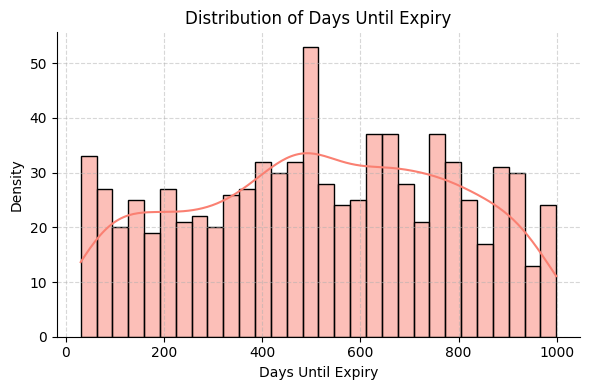

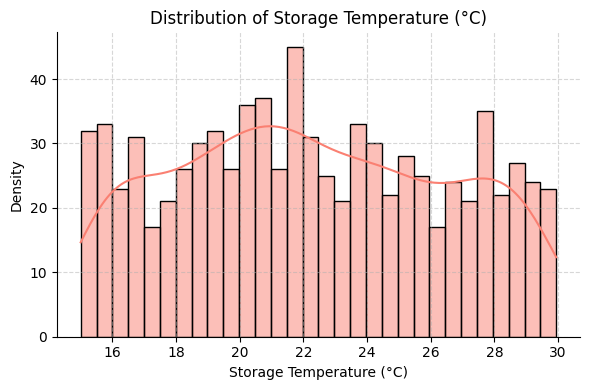

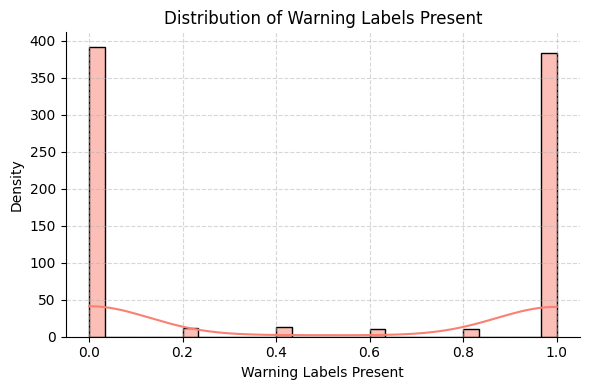

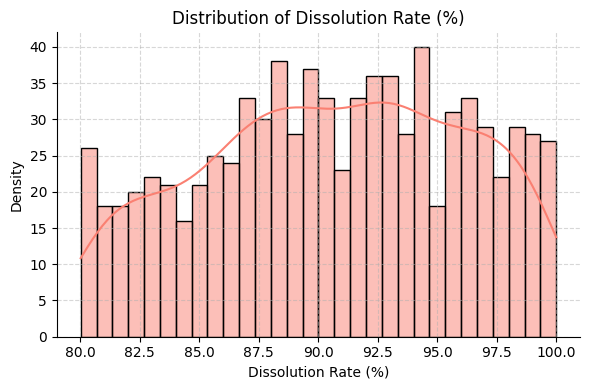

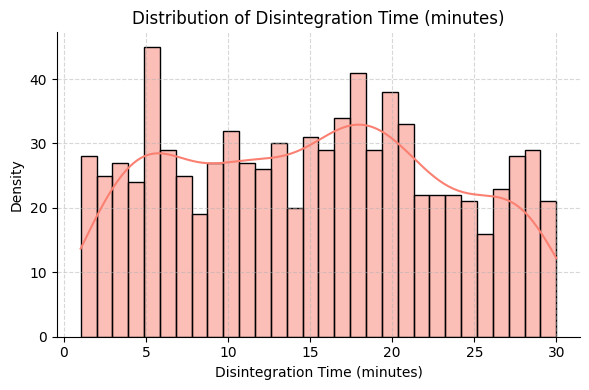

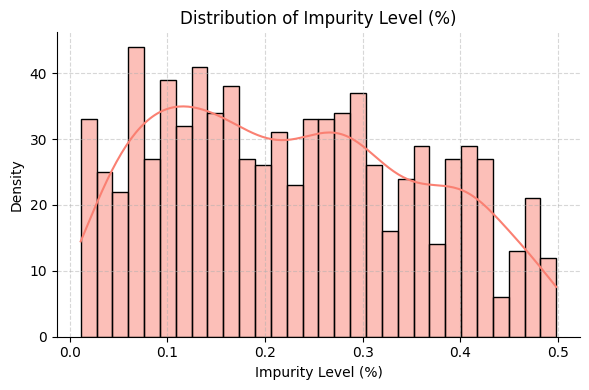

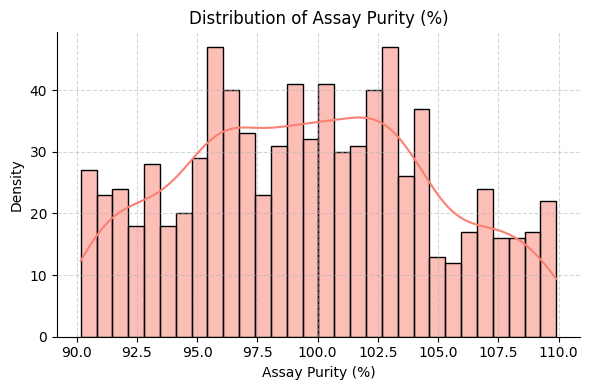

In [29]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loop through each and plot
for col in num_cols:
    sns.displot(data=df_cleaned, x=col, kde=True, bins=30, aspect=1.5, height=4, color='salmon')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Multivaraite Analysis

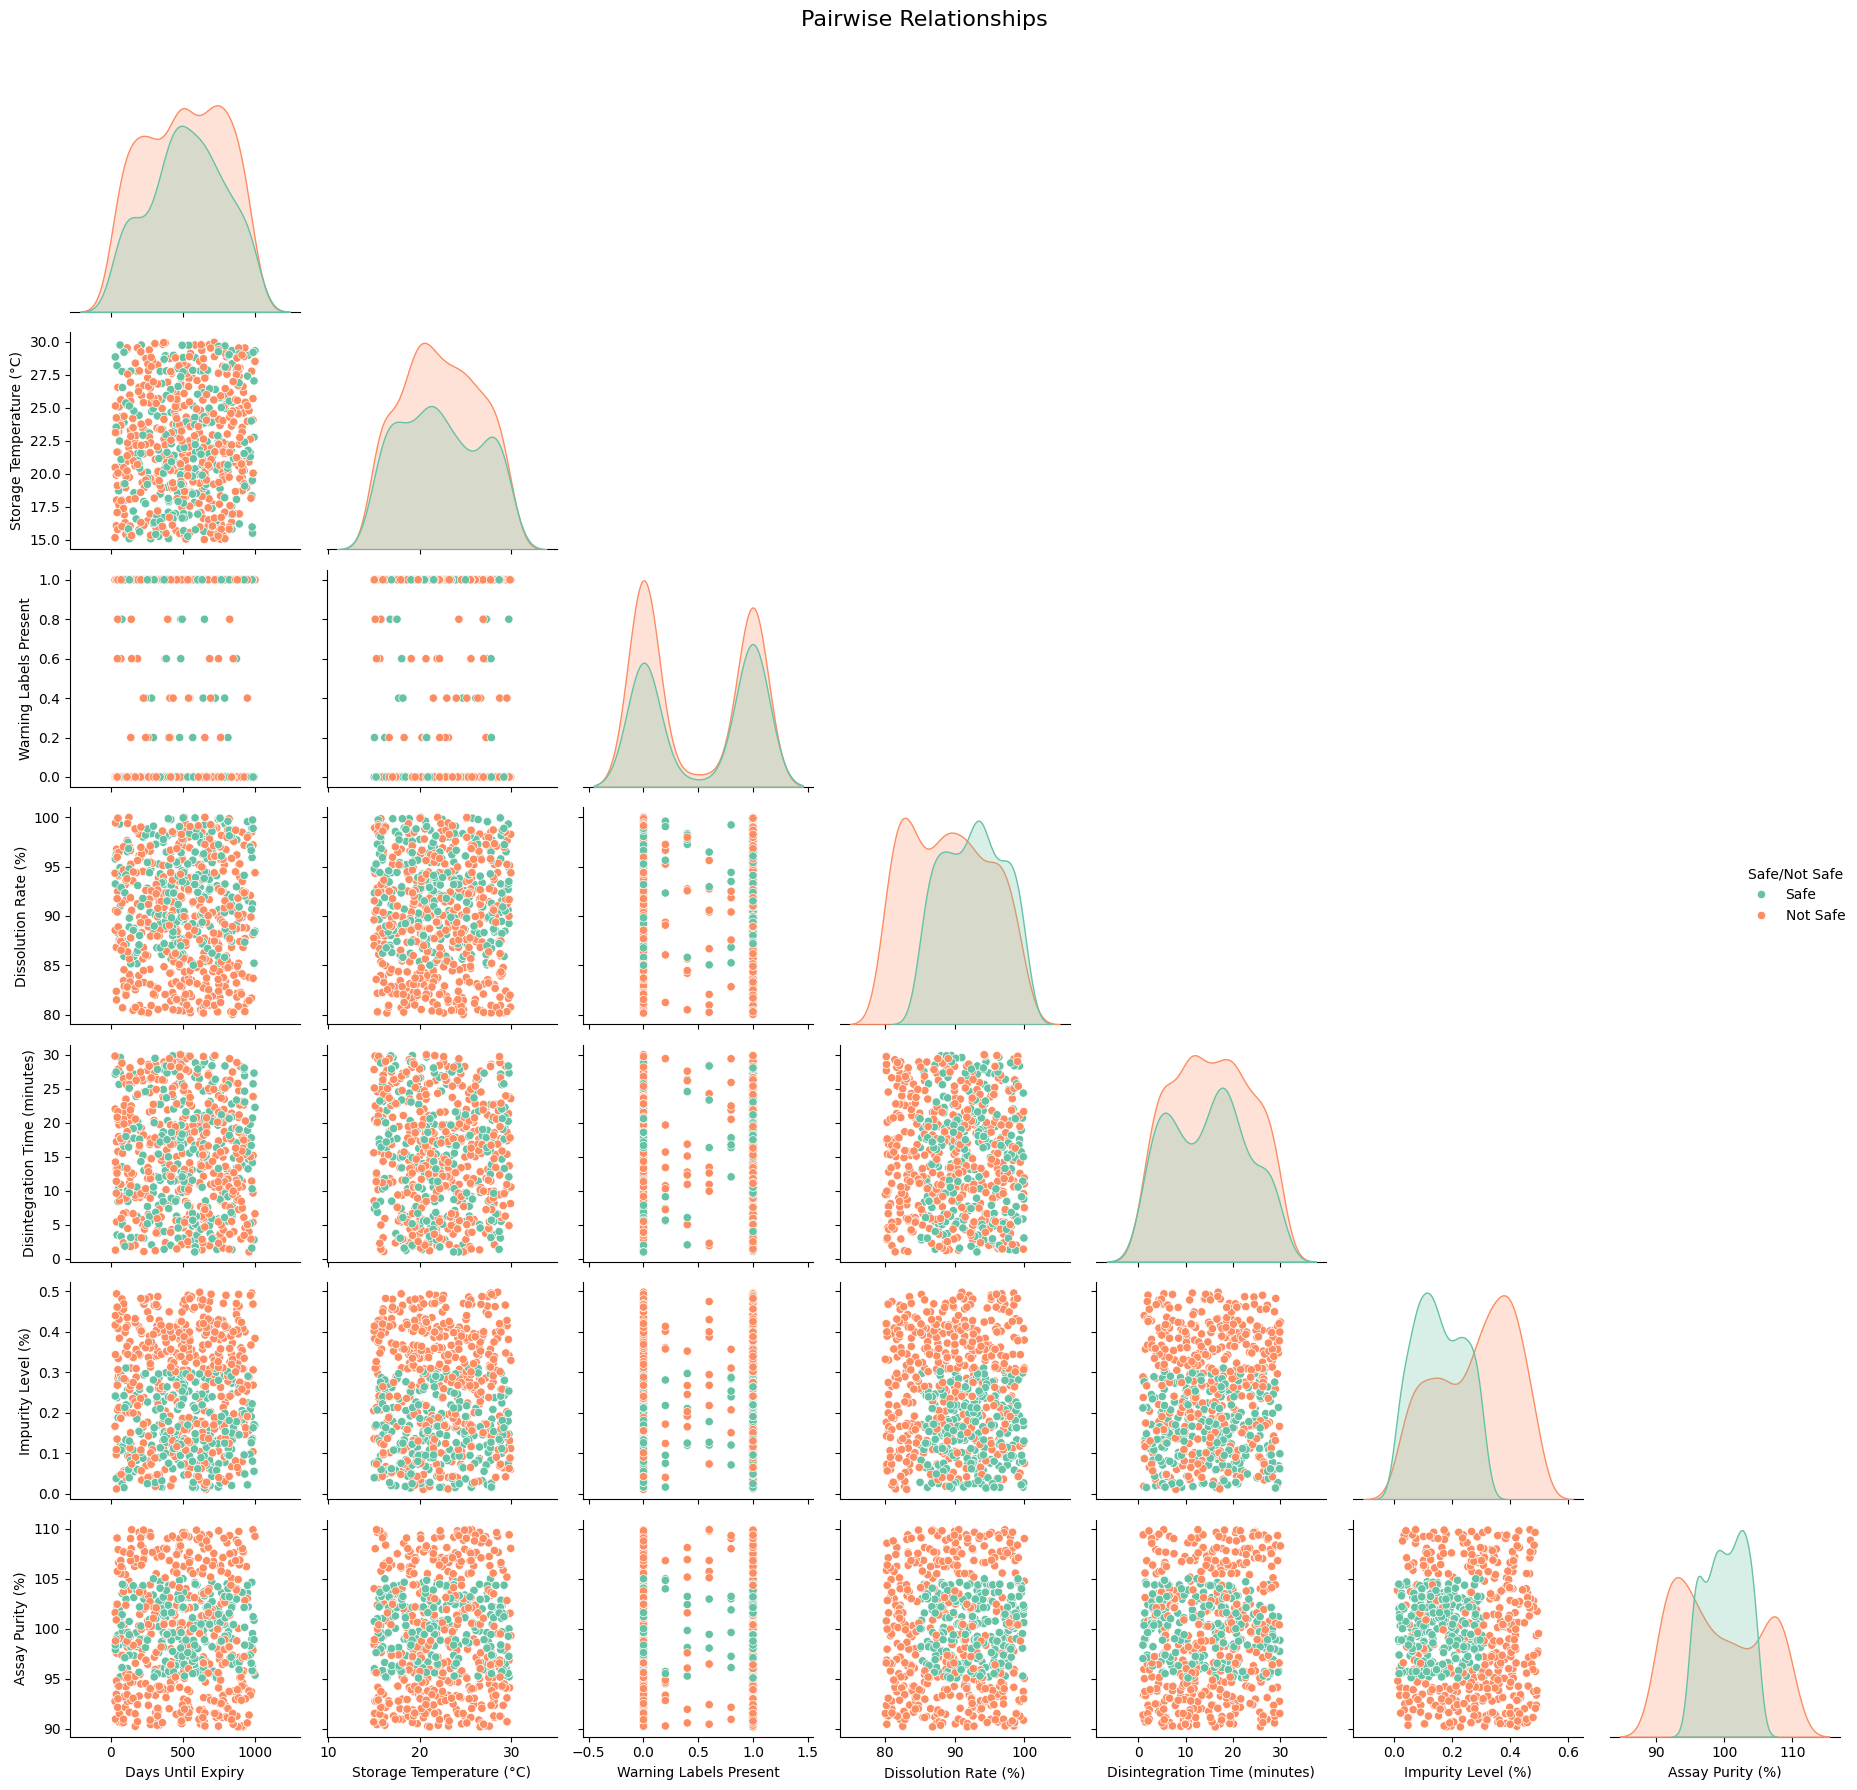

In [30]:
sns.pairplot(
    df_cleaned,
    hue='Safe/Not Safe',
    diag_kind='kde',
    corner=True,
    palette='Set2',
    height=2.5  # adjust for size
)

plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Check for correlattion of each feature

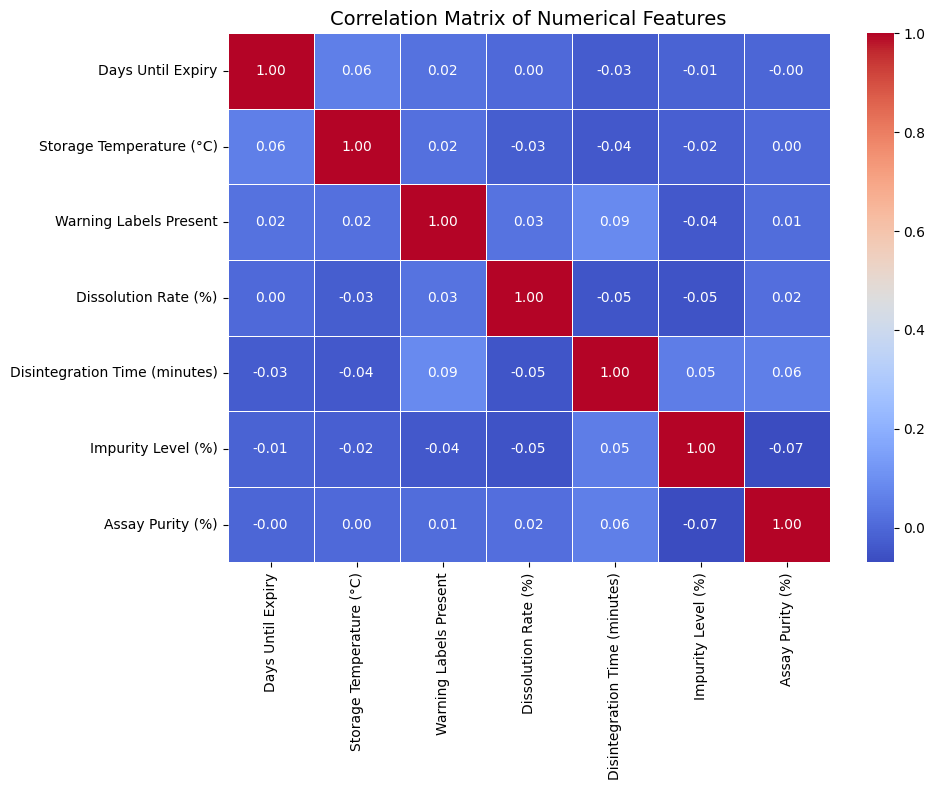

In [31]:

num_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


all correlation cofficent are very low so there is mutlicollinearity exits

Check if the means of a numeric feature are significantly different for Safe vs Not Safe

In [32]:

safe_group = df_cleaned[df_cleaned['Safe/Not Safe'] == 'Safe']['Assay Purity (%)']
not_safe_group = df_cleaned[df_cleaned['Safe/Not Safe'] == 'Not Safe']['Assay Purity (%)']

t_stat, p_val = ttest_ind(safe_group.dropna(), not_safe_group.dropna(), equal_var=False)
print("T-Statistic:", t_stat)
print("p-value:", p_val)


T-Statistic: 2.7045624536125406
p-value: 0.0070036145621257765


Observation:-    p-value < 0.05, we reject the null hypothesis at the 95% confidence level.

check for Active Ingredients

In [33]:
# Create contingency table
contingency = pd.crosstab(df_cleaned['Active Ingredient'], df_cleaned['Safe/Not Safe'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi-Square Statistic: 14.058693995423933
Degrees of Freedom: 9
p-value: 0.12025263349076254


Since the **p-value (0.120) > 0.05**, we **fail to reject the null hypothesis** at the 95% confidence level.

There is **no statistically significant association** between the `Active Ingredient` and the `Safe/Not Safe` classification of the drug in this dataset.

While the p-value is not extremely high (e.g., > 0.5), it's still **not small enough** to indicate a meaningful relationship. The observed variation may be due to **random chance**.


# Categorical value to numeric values

In [34]:
df_cleaned.dtypes

Active Ingredient                 object
Safe/Not Safe                     object
Days Until Expiry                float64
Storage Temperature (°C)         float64
Warning Labels Present           float64
Dissolution Rate (%)             float64
Disintegration Time (minutes)    float64
Impurity Level (%)               float64
Assay Purity (%)                 float64
dtype: object

In [35]:
lb=LabelEncoder()
df_cleaned['Active Ingredient'] = lb.fit_transform(df_cleaned['Active Ingredient'])

In [36]:
df_cleaned['Active Ingredient'].sample(10)

250    9
330    0
146    2
920    6
452    4
764    7
358    0
944    1
982    4
11     2
Name: Active Ingredient, dtype: int32

In [37]:
train,test=train_test_split(df_cleaned,test_size=0.1,random_state=42)

In [38]:
x=train.drop(columns=['Safe/Not Safe'])
y=train['Safe/Not Safe']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
rf=RandomForestClassifier(n_estimators=300,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test,y_pred))

Random Forest Classifier
Accuracy: 0.9797297297297297


In [41]:
gb=GradientBoostingClassifier(n_estimators=1000,random_state=42)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test,y_pred))

Gradient Boosting Classifier
Accuracy: 0.9797297297297297


In [42]:
dc=DecisionTreeClassifier(random_state=42)
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test,y_pred))


Decision Tree Classifier
Accuracy: 0.9662162162162162


In [43]:
svc=SVC(probability=True,random_state=42)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Support Vector Classifier")
print("Accuracy:", accuracy_score(y_test,y_pred))

Support Vector Classifier
Accuracy: 0.6081081081081081


In [44]:
le1=le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train_encoded)
y_pred = xgb.predict(x_test)
print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

XGBoost Classifier
Accuracy: 0.972972972972973


so best perfoming model is Random forest model so hperparameter tuning required to enhanced Accuracy

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,        # use all cores
                           scoring='accuracy',
                           verbose=2)


In [46]:
grid_search.fit(x_train, y_train)
print("Best Parameters:\n", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
print("Best Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters:
 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Classifier Accuracy: 0.9797297297297297


In [47]:
y_pred=best_rf.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[87  3]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

    Not Safe       1.00      0.97      0.98        90
        Safe       0.95      1.00      0.97        58

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148



test on the data we separte train and test so testing on the test data

In [51]:
test_x=test.drop(columns=['Safe/Not Safe'])
test_y=test['Safe/Not Safe']
y_pred=best_rf.predict(test_x)
print("Test Set Accuracy:", accuracy_score(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))


Test Set Accuracy: 0.9879518072289156
Confusion Matrix:
 [[44  1]
 [ 0 38]]


dump the models


In [ ]:
import joblib

# Dump the best Random Forest model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# # Dump the label encoder
joblib.dump(lb, 'label_encoder.pkl')
